### Data engineering
### Dataset:Hand Movements Direction
### Author: Edgar Acuna  
### Created: March 22, 2025

In [4]:
# cnn lstm model
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 

In [5]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing


def load_data(dataset, split="Train"):
    if split=="Train":
        X, y= load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


### The training dataset

In [7]:
# loading Training data
X, y = load_data("HandMovementDirection",split="Train")

 Shape of X =  (160, 10, 400)
 Shape of y =  (160,)
 New shape of X =  (160, 400, 10)
 New shape of y =  (160, 4)


In [8]:
X.shape

(160, 400, 10)

In [9]:
#class size in training 
import numpy as np
np.sum(y,axis=0)

array([40, 40, 40, 40])

In [10]:
import numpy as np
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [11]:
X1=X[yo==0]
X2=X[yo==1]
X3=X[yo==2]
X4=X[yo==3]
print(X3.shape)

(40, 400, 10)


In [12]:
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
Xa3=X3.mean(axis=0).T
Xa3=pd.DataFrame(Xa3)
Xa4=X4.mean(axis=0).T
Xa4=pd.DataFrame(Xa4)
print(Xa3.shape)

(10, 400)


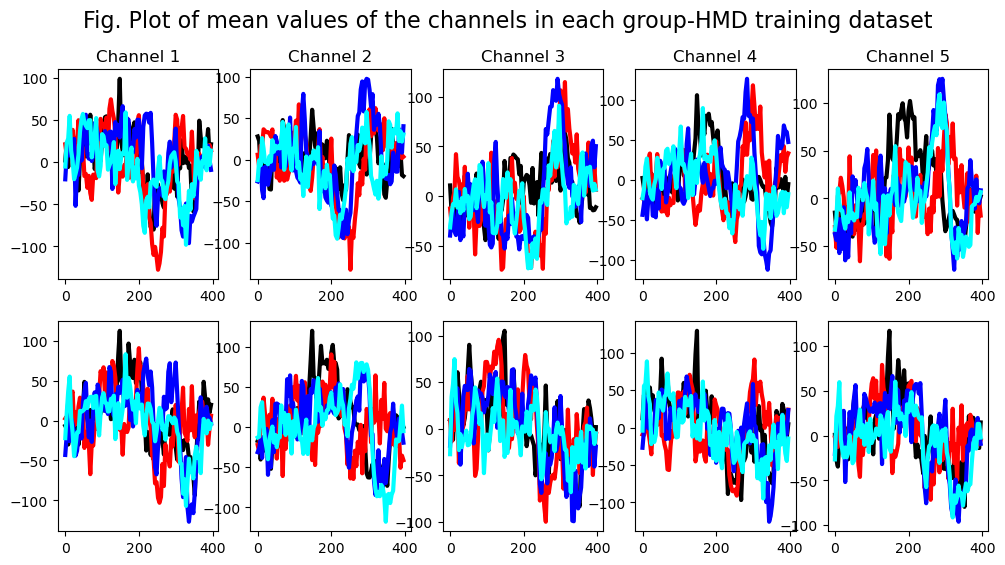

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(2, 5,figsize=(12,6))
ejex=np.arange(0,400,4)
fig.suptitle("Fig. Plot of mean values of the channels in each group-HMD training dataset",fontsize=16)
axs[0,0].plot(ejex, Xa1.iloc[0,ejex], color='black',lw=3, label='G1')
axs[0,0].plot(ejex, Xa2.iloc[0,ejex], color='red',lw=3,  label='G1')
axs[0,0].plot(ejex,Xa3.iloc[9,ejex], color='blue', lw=3, label='G1')
axs[0,0].plot(ejex, Xa4.iloc[0,ejex], color='cyan', lw=3,  label='G1')
axs[0,0].set_title("Channel 1")
axs[0,1].plot(ejex, Xa1.iloc[1,ejex], color='black',lw=3,  label='G1')
axs[0,1].plot(ejex,Xa2.iloc[1,ejex], color='red', lw=3, label='G1')
axs[0,1].plot(ejex, Xa3.iloc[1,ejex], color='blue', lw=3,  label='G1')
axs[0,1].plot(ejex, Xa4.iloc[1,ejex], color='cyan', lw=3,  label='G1')
axs[0,1].set_title("Channel 2")
axs[0,2].plot(ejex, Xa1.iloc[2,ejex], color='black',lw=3,  label='G1')
axs[0,2].plot(ejex,Xa2.iloc[2,ejex], color='red', lw=3, label='G1')
axs[0,2].plot(ejex, Xa3.iloc[2,ejex], color='blue', lw=3, label='G1')
axs[0,2].plot(ejex,Xa4.iloc[2,ejex], color='cyan', lw=3, label='G2')
axs[0,2].set_title("Channel 3")
axs[0,3].plot(ejex, Xa1.iloc[3,ejex], color='black', lw=3, label='G2')
axs[0,3].plot(ejex, Xa2.iloc[3,ejex], color='red',lw=3,  label='G2')
axs[0,3].plot(ejex, Xa3.iloc[3,ejex], color='blue',lw=3,  label='G2')
axs[0,3].plot(ejex,Xa4.iloc[3,ejex], color='cyan', lw=3, label='G2')
axs[0,3].set_title("Channel 4")
axs[0,4].plot(ejex, Xa1.iloc[4,ejex], color='black', lw=3, label='G2')
axs[0,4].plot(ejex, Xa2.iloc[4,ejex], color='red', lw=3, label='G2')
axs[0,4].plot(ejex, Xa3.iloc[4,ejex], color='blue',lw=3,  label='G2')
axs[0,4].plot(ejex,Xa4.iloc[4,ejex], color='cyan', lw=3, label='G2')
axs[0,4].set_title("Channel 5")
axs[1,0].plot(ejex, Xa1.iloc[5,ejex], color='black', lw=3, label='G2')
axs[1,0].plot(ejex, Xa2.iloc[5,ejex], color='red', lw=3, label='G3')
axs[1,0].plot(ejex, Xa3.iloc[5,ejex], color='blue',lw=3, label='G3')
axs[1,0].plot(ejex,Xa4.iloc[5,ejex], color='cyan', lw=3, label='G3')
axs[1,1].plot(ejex, Xa1.iloc[6,ejex], color='black',lw=3, label='G3')
axs[1,1].plot(ejex,Xa2.iloc[6,ejex], color='red', lw=3, label='G3')
axs[1,1].plot(ejex, Xa3.iloc[6,ejex], color='blue', lw=3, label='G3')
axs[1,1].plot(ejex, Xa4.iloc[6,ejex], color='cyan', lw=3,  label='G3')
axs[1,2].plot(ejex, Xa1.iloc[7,ejex], color='black',lw=3, label='G3')
axs[1,2].plot(ejex,Xa2.iloc[7,ejex], color='red', lw=3, label='G3')
axs[1,2].plot(ejex, Xa3.iloc[7,ejex], color='blue', lw=3,  label='G3')
axs[1,2].plot(ejex, Xa4.iloc[7,ejex], color='cyan', lw=3, label='G4')
axs[1,3].plot(ejex, Xa1.iloc[8,ejex], color='black',lw=3, label='G4')
axs[1,3].plot(ejex,Xa2.iloc[8,ejex], color='red', lw=3, label='G4')
axs[1,3].plot(ejex, Xa3.iloc[8,ejex], color='blue',lw=3, label='G4')
axs[1,3].plot(ejex,Xa4.iloc[8,ejex], color='cyan', lw=3, label='G4')
axs[1,4].plot(ejex, Xa1.iloc[9,ejex], color='black', lw=3, label='G4')
axs[1,4].plot(ejex, Xa2.iloc[9,ejex], color='red', lw=3,label='G4')
axs[1,4].plot(ejex, Xa3.iloc[9,ejex], color='blue',lw=3, label='G4')
axs[1,4].plot(ejex,Xa4.iloc[9,ejex], color='cyan', lw=3, label='G4')
#ax.legend(loc='best', frameon=False)
plt.show()

In [14]:
Xa=X.mean(axis=0).T
Xa=pd.DataFrame(Xa)

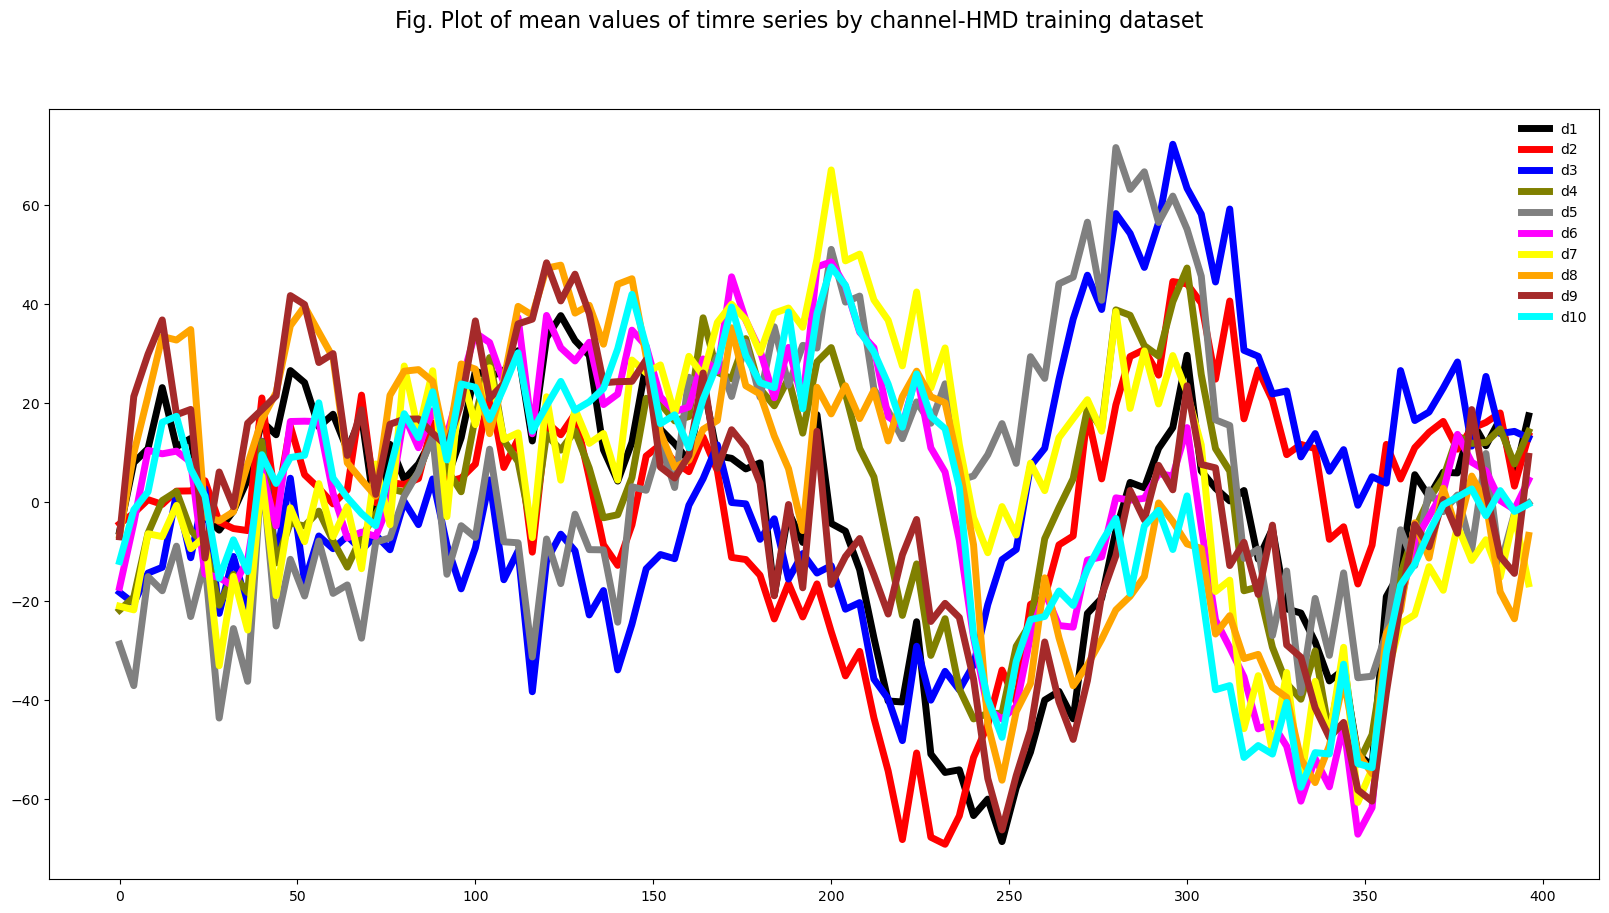

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,400,4)
fig.suptitle("Fig. Plot of mean values of timre series by channel-HMD training dataset",fontsize=16)
ax.plot(ejex, Xa.iloc[0,ejex], color='black',lw=5, label='d1')
ax.plot(ejex,Xa.iloc[1,ejex], color='red', lw=5, label='d2')
ax.plot(ejex, Xa.iloc[2,ejex], color='blue', lw=5, label='d3')
ax.plot(ejex,Xa.iloc[3,ejex], color='olive', lw=5, label='d4')
ax.plot(ejex, Xa.iloc[4,ejex], color='gray', lw=5, label='d5')
ax.plot(ejex,Xa.iloc[5,ejex], color='magenta', lw=5, label='d6')
ax.plot(ejex, Xa.iloc[6,ejex], color='yellow',lw=5, label='d7')
ax.plot(ejex,Xa.iloc[7,ejex], color='orange', lw=5, label='d8')
ax.plot(ejex, Xa.iloc[8,ejex], color='brown',lw=5,  label='d9')
ax.plot(ejex,Xa.iloc[9,ejex], color='cyan', lw=5, label='d10')
ax.legend(loc='best', frameon=False)
plt.show()

(64000, 10)


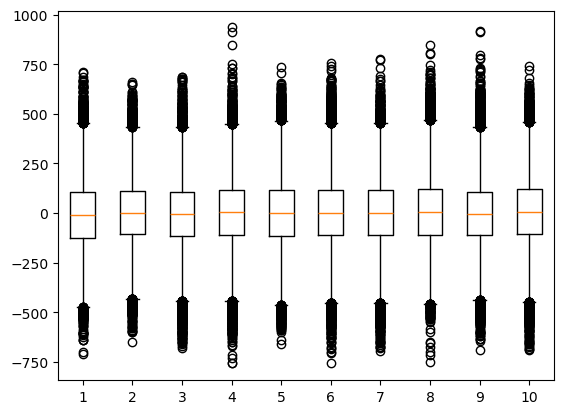

In [16]:
#Boxplots of the features in the training set
tempotr=X.reshape(X.shape[2],-1).T
tempodftr=pd.DataFrame(tempotr)
print(tempodftr.shape)
pyplot.boxplot(tempodftr)
pyplot.show()

In [17]:
#Boxplots of the features in each group of the training dataset 
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
temptr.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>,
        <Axes: title={'center': '2'}, xlabel='[group]'>],
       [<Axes: title={'center': '3'}, xlabel='[group]'>,
        <Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>],
       [<Axes: title={'center': '6'}, xlabel='[group]'>,
        <Axes: title={'center': '7'}, xlabel='[group]'>,
        <Axes: title={'center': '8'}, xlabel='[group]'>],
       [<Axes: title={'center': '9'}, xlabel='[group]'>, <Axes: >,
        <Axes: >]], dtype=object)

In [18]:
temptr.groupby('group').mean()

,0,1,2,3,4,5,6,7,8,9
group,,,,,,,,,,
0,-19.084679,-2.360135,-8.272776,4.759517,1.712257,-2.493012,-2.044105,2.918489,-19.715125,11.791307
1,-15.569944,-6.792749,-2.264707,-0.633778,0.865654,-4.334106,-5.420922,6.561148,-22.672384,12.687110
2,-3.926221,3.928255,-5.998363,8.868226,-0.123386,11.147830,5.579501,9.352672,16.730290,5.538316
3,2.297460,12.489037,-5.649667,-3.950579,8.593653,3.320636,2.218342,13.351852,20.789199,2.980469


### Distances

In [20]:
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform

distances = pdist(means, metric='euclidean')
distances

array([11.64096256, 44.13281693, 51.83480503, 48.24822111, 54.03154281,
       21.54122544])

In [21]:
distances.min()

11.640962556156353

In [22]:
distances.max()

54.03154281109874

In [23]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)

(1600, 400)


In [24]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(400,)

In [25]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()

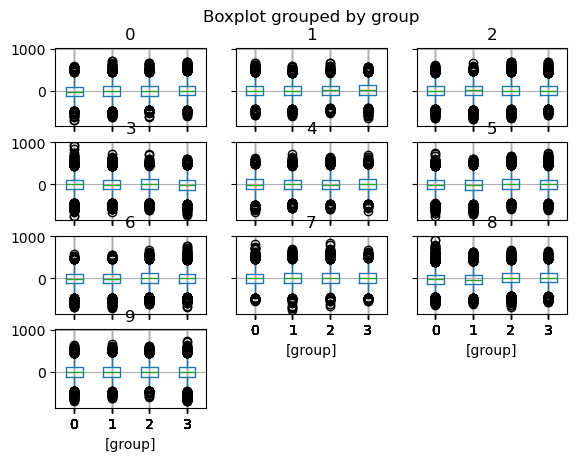

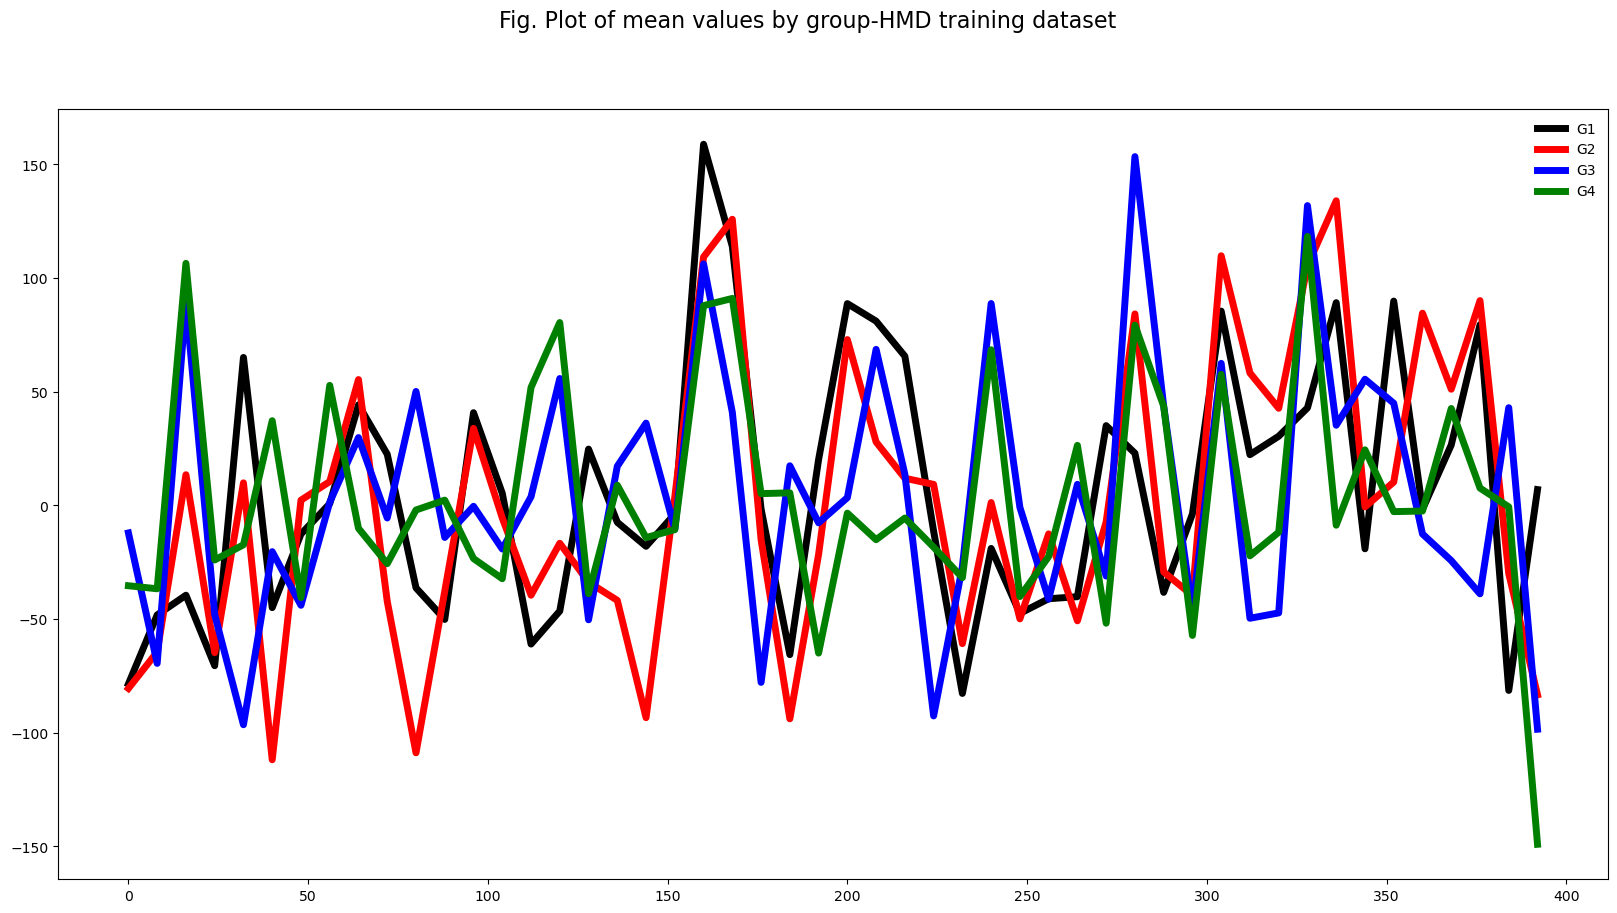

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,400,8)
fig.suptitle("Fig. Plot of mean values by group-HMD training dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax.plot(ejex, a.iloc[3,ejex], color='green', lw=5, label='G4')
ax.legend(loc='best', frameon=False)
plt.show()

### Feature selection

In [28]:
#Feature selection
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:400]
scores = mutual_info_classif(Xm,ym)
scores /= scores.max()
importance=[i for i,v in enumerate(scores) if v > .5]
len(importance)*100/400

11.0

In [29]:
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#critcal p-value=.10
importance=[i for i,v in enumerate(scores) if v > 1]
len(importance)*100/400

97.25

In [30]:
### The testing dataset

In [31]:
# loading Testing data
Xt, yt = load_data("HandMovementDirection",split="Test")

 Shape of X =  (74, 10, 400)
 Shape of y =  (74,)
 New shape of X =  (74, 400, 10)
 New shape of y =  (74, 4)


In [32]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

In [33]:
X1t=Xt[yto==0]
X2t=Xt[yto==1]
X3t=Xt[yto==2]
X4t=Xt[yto==3]
print(X3t.shape)

(15, 400, 10)


In [34]:
Xta1=X1t.mean(axis=0).T
Xta1=pd.DataFrame(Xta1)
Xta2=X2t.mean(axis=0).T
Xta2=pd.DataFrame(Xta2)
Xta3=X3t.mean(axis=0).T
Xta3=pd.DataFrame(Xta3)
Xta4=X4t.mean(axis=0).T
Xta4=pd.DataFrame(Xta4)
print(Xta3.shape)

(10, 400)


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,400,48)
fig.suptitle("Fig. Plot of mean values by dimension en each group-HMD testing dataset",fontsize=16)
ax.plot(ejex, Xta1.iloc[0,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xta1.iloc[1,ejex], color='black', lw=3, label='G1')
ax.plot(ejex, Xta1.iloc[2,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xta1.iloc[3,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xta1.iloc[4,ejex], color='black', lw=3, label='G1')
ax.plot(ejex, Xta1.iloc[5,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xta1.iloc[6,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xta1.iloc[7,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xta1.iloc[8,ejex], color='black', lw=3, label='G1')
ax.plot(ejex, Xta1.iloc[9,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xta2.iloc[0,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xta2.iloc[1,ejex], color='red', lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xta2.iloc[2,ejex], color='red',lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xta2.iloc[3,ejex], color='red',lw=3, alpha=0.5, label='G2')
ax.plot(ejex,Xta2.iloc[4,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xta2.iloc[5,ejex], color='red', lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xta2.iloc[6,ejex], color='red', lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xta2.iloc[7,ejex], color='red',lw=3, alpha=0.5, label='G2')
ax.plot(ejex,Xta2.iloc[8,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xta2.iloc[9,ejex], color='red', lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xta3.iloc[0,ejex], color='blue', lw=3, alpha=0.5, label='G3')
ax.plot(ejex, Xta3.iloc[1,ejex], color='blue',lw=3, alpha=0.5, label='G3')
ax.plot(ejex,Xta3.iloc[2,ejex], color='blue', lw=3, label='G3')
ax.plot(ejex, Xta3.iloc[3,ejex], color='blue',lw=3, alpha=0.5, label='G3')
ax.plot(ejex,Xta3.iloc[4,ejex], color='blue', lw=3, label='G3')
ax.plot(ejex, Xta3.iloc[5,ejex], color='blue', lw=3, alpha=0.5, label='G3')
ax.plot(ejex, Xta3.iloc[6,ejex], color='blue', lw=3, alpha=0.5, label='G3')
ax.plot(ejex, Xta3.iloc[7,ejex], color='blue',lw=3, alpha=0.5, label='G3')
ax.plot(ejex,Xta3.iloc[8,ejex], color='blue', lw=3, label='G3')
ax.plot(ejex, Xta3.iloc[9,ejex], color='blue', lw=3, alpha=0.5, label='G3')
ax.plot(ejex, Xta4.iloc[0,ejex], color='green', lw=3, alpha=0.5, label='G4')
ax.plot(ejex, Xta4.iloc[1,ejex], color='green',lw=3, alpha=0.5, label='G4')
ax.plot(ejex,Xta4.iloc[2,ejex], color='green', lw=3, label='G4')
ax.plot(ejex, Xta4.iloc[3,ejex], color='green',lw=3, alpha=0.5, label='G4')
ax.plot(ejex,Xta4.iloc[4,ejex], color='green', lw=3, label='G4')
ax.plot(ejex, Xta4.iloc[5,ejex], color='green', lw=3, alpha=0.5, label='G4')
ax.plot(ejex, Xta4.iloc[6,ejex], color='green', lw=3, alpha=0.5, label='G4')
ax.plot(ejex, Xta4.iloc[7,ejex], color='green',lw=3, alpha=0.5, label='G4')
ax.plot(ejex,Xta4.iloc[8,ejex], color='green', lw=3, label='G4')
ax.plot(ejex, Xta4.iloc[9,ejex], color='green', lw=3, alpha=0.5, label='G4')
#ax.legend(loc='best', frameon=False)

In [36]:
#class size in testing
import numpy as np
np.sum(yt,axis=0)

array([15, 30, 15, 14])

In [37]:
ar=np.sum(yt,axis=0)
np.max(ar/Xt.shape[0])

0.40540540540540543

(29600, 10)


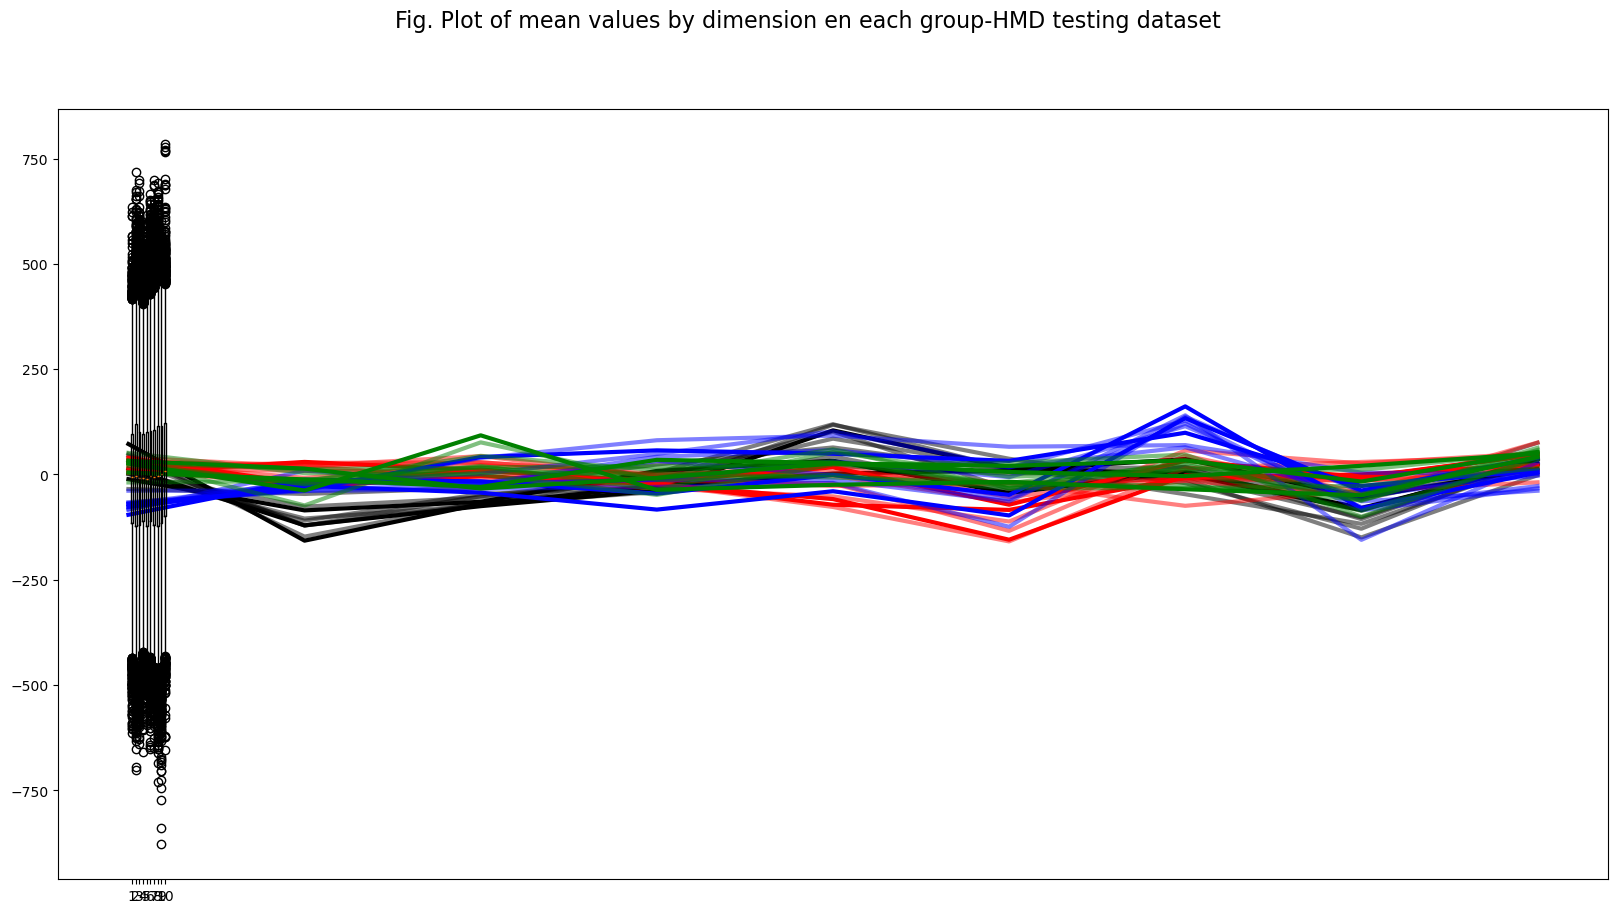

In [38]:
#Boxplots of features in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
pyplot.boxplot(tempodfte)
pyplot.show()

In [39]:
#Boxplots of features in each group of the testing dataset
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
tempte.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>,
        <Axes: title={'center': '2'}, xlabel='[group]'>],
       [<Axes: title={'center': '3'}, xlabel='[group]'>,
        <Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>],
       [<Axes: title={'center': '6'}, xlabel='[group]'>,
        <Axes: title={'center': '7'}, xlabel='[group]'>,
        <Axes: title={'center': '8'}, xlabel='[group]'>],
       [<Axes: title={'center': '9'}, xlabel='[group]'>, <Axes: >,
        <Axes: >]], dtype=object)

In [40]:
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
tempte.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>,
        <Axes: title={'center': '2'}, xlabel='[group]'>],
       [<Axes: title={'center': '3'}, xlabel='[group]'>,
        <Axes: title={'center': '4'}, xlabel='[group]'>,
        <Axes: title={'center': '5'}, xlabel='[group]'>],
       [<Axes: title={'center': '6'}, xlabel='[group]'>,
        <Axes: title={'center': '7'}, xlabel='[group]'>,
        <Axes: title={'center': '8'}, xlabel='[group]'>],
       [<Axes: title={'center': '9'}, xlabel='[group]'>, <Axes: >,
        <Axes: >]], dtype=object)

In [41]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(234, 400, 10)


In [42]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA.shape)

(1600, 400)


In [43]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
#f = plt.figure(figsize=(10,3))
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
#fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,400,8)
fig.suptitle("Fig. Plot of mean values of all time series by group-HMD trainng (above) and testing(below) dataset",fontsize=16)
ax1.plot(ejex, a.iloc[0,ejex], color='black',lw=5,  label='G1')
ax1.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax1.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax1.plot(ejex, a.iloc[3,ejex], color='green', lw=5, label='G4')
ax1.legend(loc='best', frameon=False)
ax2.plot(ejex, a1.iloc[0,ejex], color='black',lw=5, label='G1')
ax2.plot(ejex,a1.iloc[1,ejex], color='red', lw=5, label='G2')
ax2.plot(ejex, a1.iloc[2,ejex], color='blue', lw=5,  label='G3')
ax2.plot(ejex, a1.iloc[3,ejex], color='green', lw=5, label='G4')
ax2.legend(loc='best', frameon=False)

In [45]:
Xa=X.mean(axis=0).T
Xa=pd.DataFrame(Xa)

In [46]:
Xa.shape

(10, 400)

In [47]:
Xta=Xt.mean(axis=0).T
Xta=pd.DataFrame(Xta)

In [48]:
Xta.shape

(10, 400)

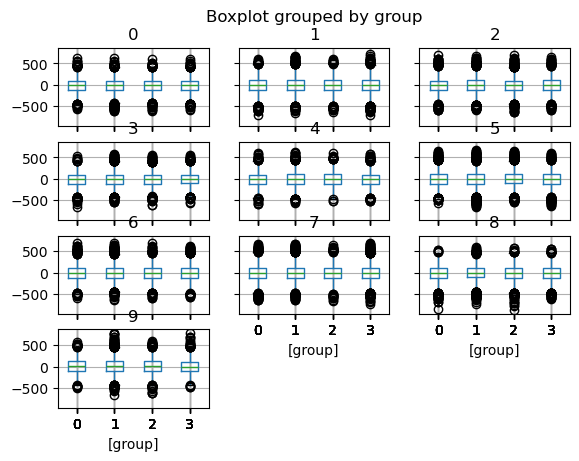

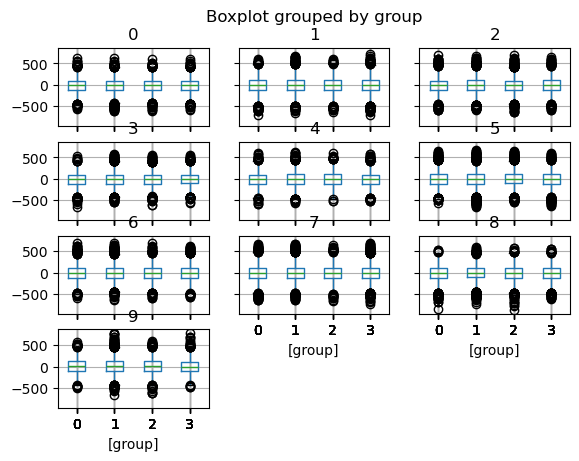

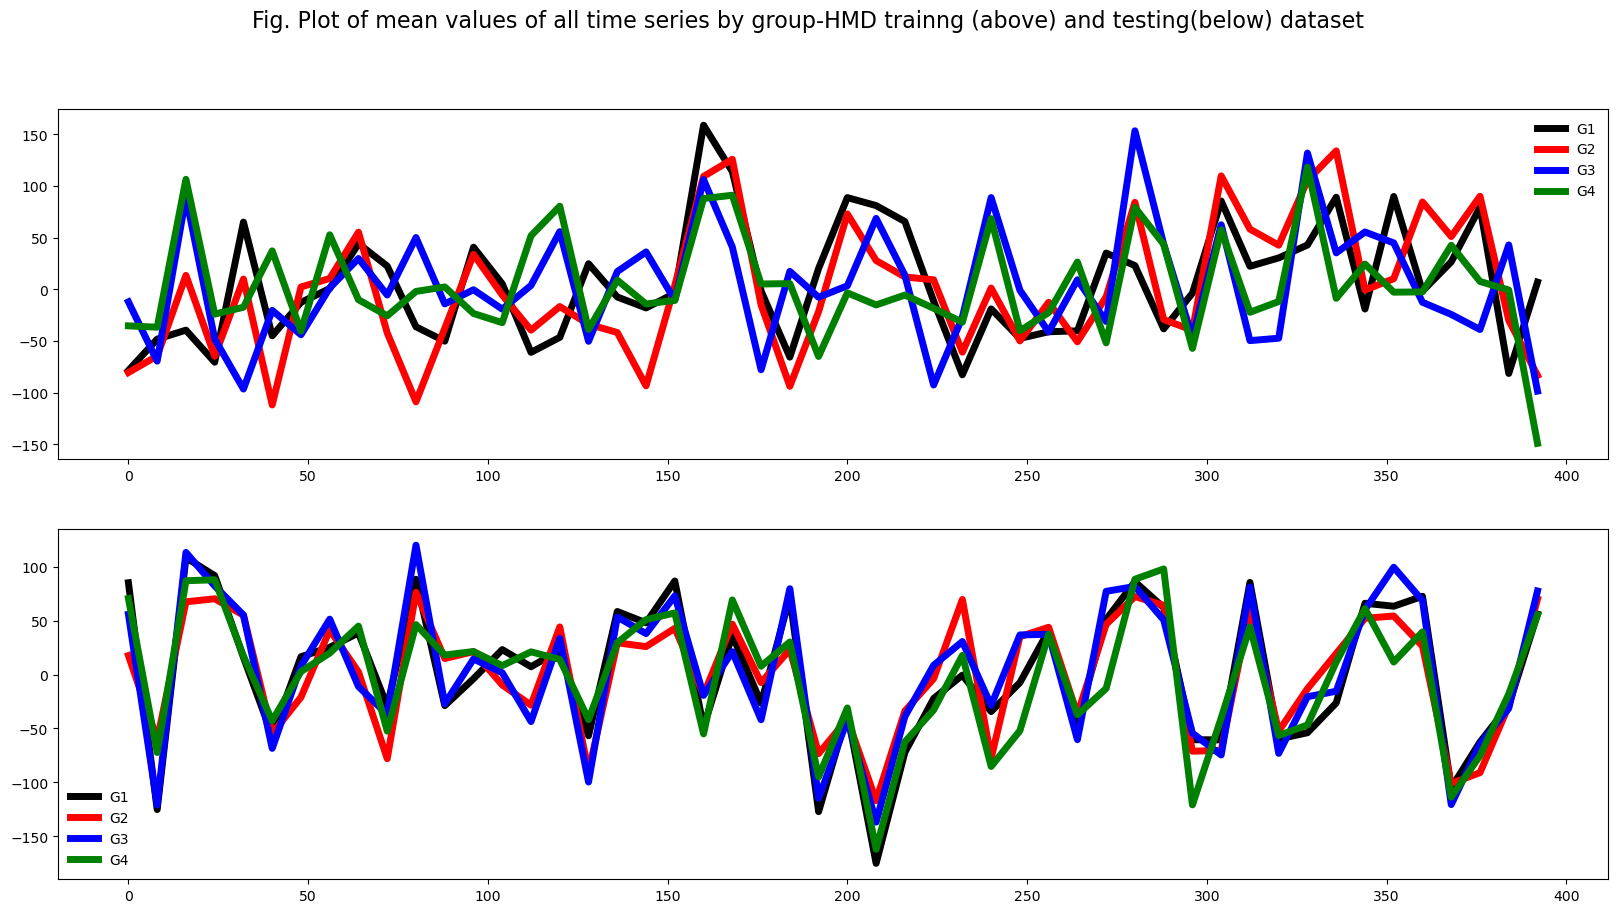

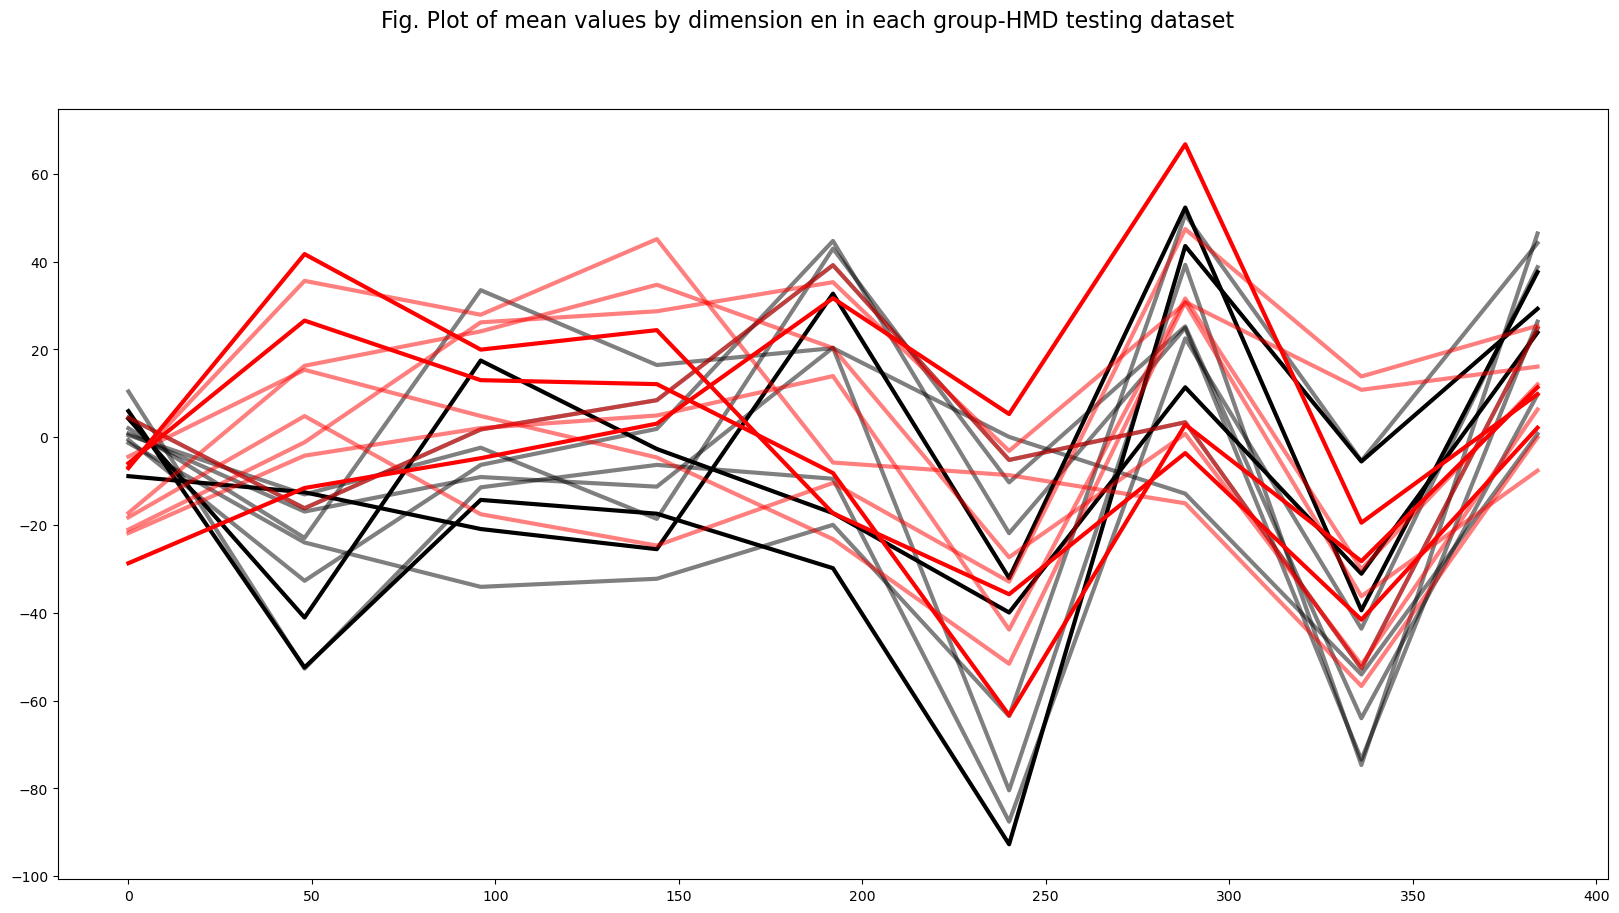

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,400,48)
fig.suptitle("Fig. Plot of mean values by dimension en in each group-HMD testing dataset",fontsize=16)
ax.plot(ejex, Xta.iloc[0,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xta.iloc[1,ejex], color='black', lw=3, label='G1')
ax.plot(ejex, Xta.iloc[2,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xta.iloc[3,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xta.iloc[4,ejex], color='black', lw=3, label='G1')
ax.plot(ejex, Xta.iloc[5,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xta.iloc[6,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex, Xta.iloc[7,ejex], color='black',lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xta.iloc[8,ejex], color='black', lw=3, label='G1')
ax.plot(ejex, Xta.iloc[9,ejex], color='black', lw=3, alpha=0.5, label='G1')
ax.plot(ejex,Xa.iloc[0,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[1,ejex], color='red', lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xa.iloc[2,ejex], color='red',lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xa.iloc[3,ejex], color='red',lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xa.iloc[4,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xa.iloc[5,ejex], color='red', lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xa.iloc[6,ejex], color='red', lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xa.iloc[7,ejex], color='red',lw=3, alpha=0.5, label='G2')
ax.plot(ejex, Xa.iloc[8,ejex], color='red', lw=3, label='G2')
ax.plot(ejex, Xta.iloc[9,ejex], color='red', lw=3, alpha=0.5, label='G2')
#ax.legend(loc='best', frameon=False)
plt.show()

In [50]:
import numpy as np
Xb= np.concatenate((X, Xt),axis=0)
print(Xb.shape)

(234, 400, 10)


(93600, 10)


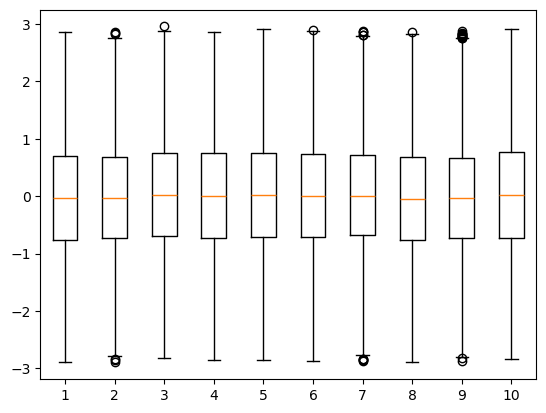

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#tempo=X.reshape(X.shape[2],-1).T
#print(tempo.shape)
X = scaler.fit_transform(X.reshape(X.shape[2], -1)).reshape(X.shape)
Xb = scaler.fit_transform(Xb.reshape(Xb.shape[2], -1)).reshape(Xb.shape)
Xt = scaler.fit_transform(Xt.reshape(Xt.shape[2], -1)).reshape(Xt.shape)
X1=Xb.reshape(Xb.shape[2],-1).T
#print(X)
tempodf=pd.DataFrame(X1)
print(tempodf.shape)
pyplot.boxplot(tempodf)
pyplot.show()

In [52]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(400,)

In [53]:
#Distance Training and Testsing
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)
dst

1456.7174306786637